In [1]:
import pandas as pd
import regex as re
import sys
sys.path.append("..")

import json

from outlier_analysis.gather_scores import free_gather_scores_with_layers
from outlier_analysis.pyplot.plotting_scores import stack_plot_perf

import numpy as np

In [4]:
scores_mlm, indices_mlm, losses_mlm = free_gather_scores_with_layers("../data_experiments/output/mlm_loss_computation/bert-base-uncased/output/")
scores_nli, indices_nli, losses_nli = free_gather_scores_with_layers("../baselines/output/scores/bert-base-uncased/layers_window_size_1/")

In [5]:
df_score = pd.concat({i:pd.DataFrame(j).T for i,j in scores_nli.items()}).sort_index(level=1, key = lambda x: [int(re.search("\d+", i).group(0)) for i in x])
df_score.columns = indices_nli["mnli"]["layers_0"]
df_score.rename({'':"Full Model"}, axis=1, inplace=True)
df_score = df_score.groupby(level=0).get_group("mnli")

df_loss = pd.concat({i:pd.DataFrame(j).T for i,j in losses_mlm.items()}).sort_index(level=1, key = lambda x: [int(re.search("\d+", i).group(0)) for i in x])
df_loss.columns = indices_mlm["mlm"]["layers_0"]
df_loss.rename({'':"Full Model"}, axis=1, inplace=True)
df_loss = df_loss.groupby(level=0).get_group("mlm")
# df_score = df_score.loc[:, [i for i in df_loss.columns if i in df_score.columns]]
df_loss = df_loss.iloc[:, [1,2,3]]
df_score = df_score.iloc[:, [1,2,3]]

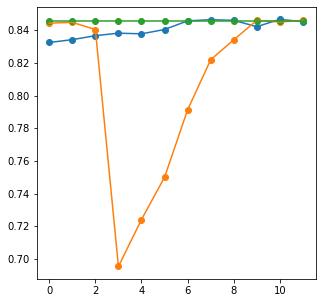

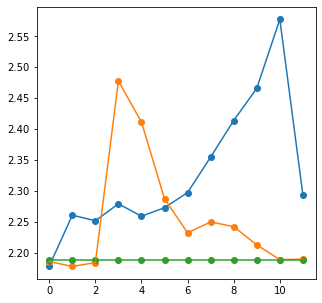

In [6]:
f1, f2, ax = stack_plot_perf(df_score, df_loss)